In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
cocacola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


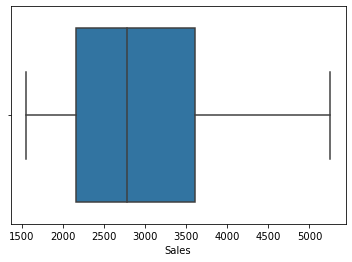

In [3]:
sns.boxplot("Sales",data=cocacola)

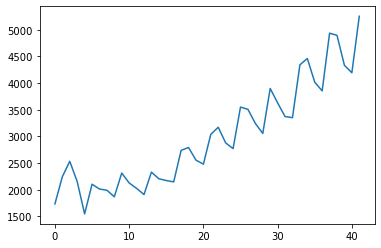

In [4]:
cocacola.Sales.plot()

## Moving average for the time series to understand better about the trend character in Amtrak

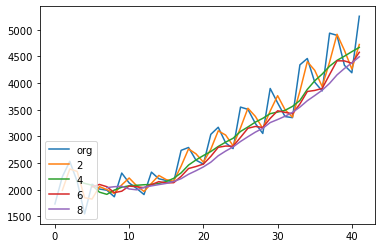

In [7]:
cocacola.Sales.plot(label="org")
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

## Time series decomposition plot

<ipython-input-10-cf4462f45661>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(cocacola.Sales,freq=5)


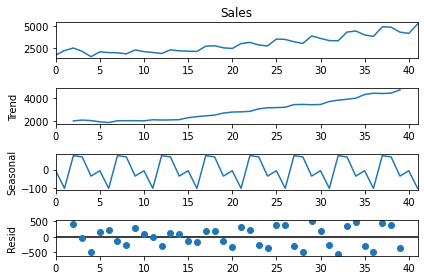

In [10]:
decompose_ts_add = seasonal_decompose(cocacola.Sales,freq=5)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

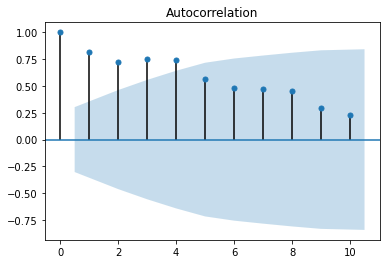

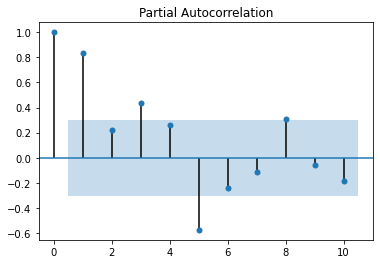

In [11]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=10)
tsa_plots.plot_pacf(cocacola.Sales,lags=10)
plt.show()

In [14]:
cocacola.shape

(42, 2)

In [17]:
Train = cocacola.head(38)
Test =cocacola.tail(12)

## Evaluation Metric MAPE

In [18]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [19]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


9.10331467119378

## Holt Method

In [20]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


9.421983778501382

## Holts winter exponential smoothing with additive seasonality and additive trend

In [21]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


3.1433974854069118

## Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [22]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.3372720257998787

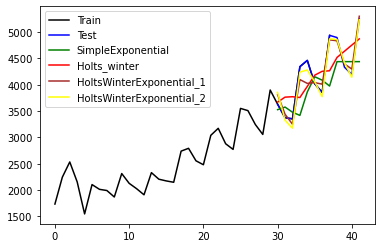

In [23]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

## Final Model by combining Train and Test

In [24]:
hwe_model_add_add = ExponentialSmoothing(cocacola["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\gkhat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [25]:
hwe_model_add_add.forecast(10)

42    4944.448446
43    4760.813873
44    4794.873611
45    5679.596175
46    5708.223284
47    5275.591794
48    5156.160832
49    6126.057105
50    5998.837135
51    5520.533456
dtype: float64